**Assignment 3 - NLP and Sentiment Analysis**

**Part 1 - Data Cleaning**

In [ ]:
import pandas as pd
df = pd.read_csv('Canadian_elections_2021.csv')
df_1 = pd.read_csv('sentiment_analysis.csv', error_bad_lines=False)

In [ ]:
df

,text,sentiment,negative_reason
0,The Canadian election is a power grab by PM Tr...,negative,calling election early
1,I do hope Trudeau loses the Canadian election ...,negative,covid
2,"Dear Canadians, This election is a test of how...",positive,NaN
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,NaN
...,...,...,...
997,This is absolutely horrible in Canada. The for...,negative,others
998,@davidakin Trudeau imposes gun control policie...,negative,gun control
999,In Canada 🇨🇦 our election is being stolen by t...,negative,others
1000,"O'Toole amends platform on gun control, but qu...",negative,tell lies


In [ ]:
df_1

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1
...,...,...,...
550386,8.046170e+17,@goddesses_o I can't stop watching her...mm. M...,0
550387,8.046180e+17,Poor old Tom Odell doesn't look like he would ...,0
550388,8.046180e+17,#antsmasher I smashed 7 ants in this awesome ...,1
550389,8.046180e+17,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1


In [ ]:
df_clean = df.copy()
df_1_clean = df_1.copy()

In [ ]:
# All html tags and attributes (i.e., /<[^>]+>/) are removed.
df_clean['text'] = df['text'].str.replace('<[^<]+?>', '')
df_1_clean['text'] = df_1['text'].str.replace('<[^<]+?>', '')

In [ ]:
# Html character codes (i.e., &...;) are replaced with an ASCII equivalent
import html
df_clean['text'] = html.unescape(df_clean['text'])
df_1_clean['text'] = html.unescape(df_1_clean['text'])

In [ ]:
# All URLs are removed. 
import re
df_clean['text'] = df_clean['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df_1_clean['text'] = df_1_clean['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [ ]:
# Punctuations are removed

df_clean['text'] = df_clean['text'].str.replace('[^\w\s]', '')
df_1_clean['text'] = df_1_clean['text'].str.replace('[^\w\s]', '')

In [ ]:
# All characters in the text are in lowercase. 

df_clean['text'] = df_clean['text'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
df_clean['negative_reason'] = df_clean['negative_reason'].fillna("nan")
df_clean['negative_reason'] = df_clean['negative_reason'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
df_1_clean['text'] = df_1_clean['text'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

In [ ]:
# All stop words are removed. Be clear in what you consider as a stop word.

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Removing stop words

df_clean['text'] = df_clean['text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
df_clean['negative_reason'] = df_clean['negative_reason'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
df_1_clean['text'] = df_1_clean['text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

In [ ]:
df_clean

,text,sentiment,negative_reason
0,canadian election power grab pm trudeau yes ta...,negative,calling election early
1,hope trudeau loses canadian election tomorrow ...,negative,covid
2,dear canadians election test progressive wheth...,positive,nan
3,canadian friends never forget trudeau 2 years ...,negative,calling election early
4,sorry thejagmeetsingh voted ndp life election ...,positive,nan
...,...,...,...
997,absolutely horrible canada forthcoming electio...,negative,others
998,davidakin trudeau imposes gun control policies...,negative,gun control
999,canada election stolen thugs uneducated goons ...,negative,others
1000,otoole amends platform gun control questions r...,negative,tell lies


In [ ]:
df_1_clean

,ID,text,label
0,7.680980e+17,josh jenkins looking forward tab breeders crow...,1
1,7.680980e+17,rt mianusmanjaved congratulations pakistan bec...,1
2,7.680980e+17,rt pepalerts september yesmag taking maine men...,1
3,7.680980e+17,rt david_gaibis newly painted walls thanks mil...,1
4,7.680980e+17,rt cedricfeschotte excited announce july 2017 ...,1
...,...,...,...
550386,8.046170e+17,goddesses_o cant stop watching hermm,0
550387,8.046180e+17,poor old tom odell doesnt look like would know...,0
550388,8.046180e+17,antsmasher smashed 7 ants awesome gamehjfjfi,1
550389,8.046180e+17,lizhudston kymwyllie evasmiless meanbok linddy...,1


**Part 2 - Exploratory Analysis**

In [ ]:
# Determine the political party of a tweet, 'unknown' if cannot be defined

df_clean['party'] = 'unknown'
df_clean.loc[(df_clean.text.str.contains('thejagmeetsingh') == True),'party']='ndp'
df_clean.loc[(df_clean.text.str.contains('ndp') == True),'party']='ndp'
df_clean.loc[(df_clean.text.str.contains('peoples party') == True),'party']='ppc'
df_clean.loc[(df_clean.text.str.contains('ppc') == True),'party']='ppc'
df_clean.loc[(df_clean.text.str.contains('bernier') == True),'party']='ppc'
df_clean.loc[(df_clean.text.str.contains('conservative') == True),'party']='conservatives'
df_clean.loc[(df_clean.text.str.contains('otoole') == True),'party']='conservatives'
df_clean.loc[(df_clean.text.str.contains('liberal') == True),'party']='liberal'
df_clean.loc[(df_clean.text.str.contains('trudeau') == True),'party']='liberal'

# This is somewhat skewed if it has multiple parties mentioned in the tweet, parties at the bottom will take the label, this makes more sense since they are more popular

In [ ]:
df_clean['party'].value_counts()

liberal          475
unknown          241
conservatives    218
ppc               48
ndp               20
Name: party, dtype: int64

In [ ]:
print(df_clean.to_string())

                                                                                                                                                                                                                                                       text sentiment                  negative_reason          party
0                                                canadian election power grab pm trudeau yes take away opposition leaders chosen obstruction 20 nonconfidence motions disinformation middle worldwide pandemic yes one wanted vote opposition antics forced  negative           calling election early        liberal
1                                  hope trudeau loses canadian election tomorrow called snap one thinking hed romp seems people dont like black face hypocrite super wokist amp covid restriction groupie lets hope polls right might make government think  negative                            covid        liberal
2                                                 dear canadians elect

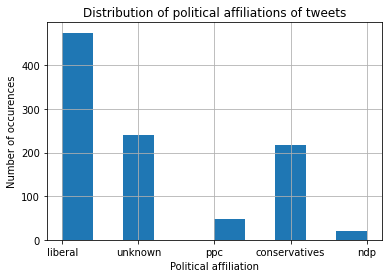

In [ ]:
# Plotting the distribution of political affiliations of tweets

import matplotlib.pyplot as plt
df_clean['party'].hist()
plt.title("Distribution of political affiliations of tweets")
plt.ylabel('Number of occurences')
plt.xlabel('Political affiliation')
plt.show()

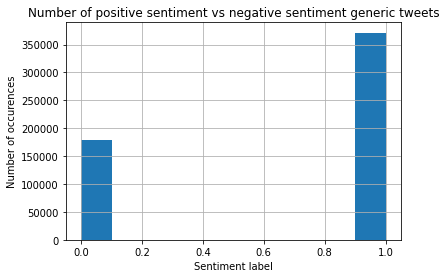

In [ ]:
# Plotting number of positive and negative sentiment of generic tweets

df_1_clean['label'].hist()
plt.title("Number of positive sentiment vs negative sentiment generic tweets")
plt.ylabel('Number of occurences')
plt.xlabel('Sentiment label')
plt.show()

**Part 3 - Model Preparation**

In [ ]:
# Add a column for tweet character length

df_1_clean_len = df_1_clean.copy()
df_1_clean_len['length'] = df_1_clean_len['text'].apply(len)

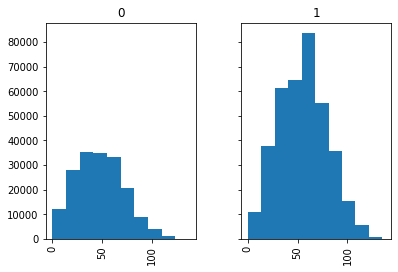

In [ ]:
# Plot length of words vs sentiment to see if there's a trend

df_1_clean_len.hist(column='length', by='label', sharex=True, sharey=True)
plt.show()

In [ ]:
# Check for common words

word_freq_election = pd.Series(''.join(df_clean['text']).split()).value_counts()
word_freq_generic = pd.Series(''.join(df_1_clean['text']).split()).value_counts()

In [ ]:
# Minimize Dataset - If there was no RAM issues, numbers of features can be chosen based on frequency, for example, if it shows up X amount of times.
# Most frequent words that appear in both datasets are used

commonwords = {}
commonwords = word_freq_generic.index & word_freq_election.index
commonwords = commonwords[:125] # Take 125 words (i.e. features)

In [ ]:
commonwords

Index(['love', 'birthday', 'happy', 'great', 'amp', 'amazing', 'good', 'im',
       'day', 'best',
       ...
       'week', '3', 'making', 'local', 'ur', 'hate', 'didnt', 'must', 'ive',
       'weekend'],
      dtype='object', length=125)

In [ ]:
# Split train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_1_clean['text'], df_1_clean['label'], test_size = 0.3, random_state = 0)

In [ ]:
# Keep only the 125 common words (Ideally to use more, but Google Colab keeps crashing if I use more)

X_train = X_train.apply(lambda x: ' '.join([item for item in x.split() if item in commonwords]))
X_test = X_test.apply(lambda x: ' '.join([item for item in x.split() if item in commonwords]))

In [ ]:
# Bag of Words for training data (Tokenizing, counting, and normalizing)

from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer()
bow_vectors_train = bow.fit_transform(X_train)
bow_feature_names_train = bow.get_feature_names_out()

bow_dense_train = bow_vectors_train.todense()
bow_denselist_train = bow_dense_train.tolist()

df_bow_train = pd.DataFrame(bow_denselist_train, columns=bow_feature_names_train)
df_bow_train

,always,amazing,amp,awesome,back,bad,beautiful,best,better,big,birthday,cant,come,cool,could,day,didnt,dont,enjoy,even,ever,every,everyone,excited,family,feel,find,first,follow,forget,free,friend,friends,fuck,fucking,fun,game,get,getting,go,...,please,pretty,proud,real,really,right,say,see,shit,show,start,still,stop,sweet,take,team,thank,thanks,thing,things,think,time,today,tonight,trump,ur,us,wait,want,way,week,weekend,well,win,work,world,would,year,years,youre
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
385269,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
385270,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
385271,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Bag of Words for test data

from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer()
bow_vectors_test = bow.fit_transform(X_test)
bow_feature_names_test = bow.get_feature_names_out()

bow_dense_test = bow_vectors_test.todense()
bow_denselist_test = bow_dense_test.tolist()

df_bow_test = pd.DataFrame(bow_denselist_test, columns=bow_feature_names_test)
df_bow_test

,always,amazing,amp,awesome,back,bad,beautiful,best,better,big,birthday,cant,come,cool,could,day,didnt,dont,enjoy,even,ever,every,everyone,excited,family,feel,find,first,follow,forget,free,friend,friends,fuck,fucking,fun,game,get,getting,go,...,please,pretty,proud,real,really,right,say,see,shit,show,start,still,stop,sweet,take,team,thank,thanks,thing,things,think,time,today,tonight,trump,ur,us,wait,want,way,week,weekend,well,win,work,world,would,year,years,youre
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165113,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
165114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
165115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
165116,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Standardize data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_bow = scaler.fit_transform(df_bow_train)
X_test_bow = scaler.fit_transform(df_bow_test)

In [ ]:
# TD-IDF (Term frequency - Inverse document frequency)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(X_train)
feature_names = vectorizer.get_feature_names_out()

dense = vectors.todense()
denselist = dense.tolist()

df_tfidf_train = pd.DataFrame(denselist, columns=feature_names)
df_tfidf_train

,always,amazing,amp,awesome,back,bad,beautiful,best,better,big,birthday,cant,come,cool,could,day,didnt,dont,enjoy,even,ever,every,everyone,excited,family,feel,find,first,follow,forget,free,friend,friends,fuck,fucking,fun,game,get,getting,go,...,please,pretty,proud,real,really,right,say,see,shit,show,start,still,stop,sweet,take,team,thank,thanks,thing,things,think,time,today,tonight,trump,ur,us,wait,want,way,week,weekend,well,win,work,world,would,year,years,youre
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.658008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.391966,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.503482,0.399868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
2,0.0,0.568486,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.822693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
4,0.0,0.605823,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385268,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
385269,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.228999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
385270,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.509411,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
385271,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.

In [ ]:
# TD-IDF (Term frequency - Inverse document frequency) for Test Data

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_1 = TfidfVectorizer()
vectors_1 = vectorizer_1.fit_transform(X_test)
feature_names_1 = vectorizer_1.get_feature_names_out()

dense_1 = vectors_1.todense()
denselist_1 = dense_1.tolist()

df_tfidf_test = pd.DataFrame(denselist_1, columns=feature_names_1)
df_tfidf_test

,always,amazing,amp,awesome,back,bad,beautiful,best,better,big,birthday,cant,come,cool,could,day,didnt,dont,enjoy,even,ever,every,everyone,excited,family,feel,find,first,follow,forget,free,friend,friends,fuck,fucking,fun,game,get,getting,go,...,please,pretty,proud,real,really,right,say,see,shit,show,start,still,stop,sweet,take,team,thank,thanks,thing,things,think,time,today,tonight,trump,ur,us,wait,want,way,week,weekend,well,win,work,world,would,year,years,youre
0,0.000000,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.570984,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.576518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.714482,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165113,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165114,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.647577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.762000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165115,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165116,0.000000,0.0,0.0,0.633454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
# Standardize data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_tfidf = scaler.fit_transform(df_tfidf_train)
X_test_tfidf = scaler.fit_transform(df_tfidf_test)

In [ ]:
# Logistic Regression Bag of Words

from sklearn.linear_model import LogisticRegression
model_lr_bow = LogisticRegression()    
model_lr_bow.fit(X_train_bow, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import make_scorer, confusion_matrix
predictions_lr_bow = model_lr_bow.predict(X_test_bow)
    
TN_lr_bow = confusion_matrix(y_test, predictions_lr_bow)[0][0]
FP_lr_bow = confusion_matrix(y_test, predictions_lr_bow)[0][1]
FN_lr_bow = confusion_matrix(y_test, predictions_lr_bow)[1][0]
TP_lr_bow = confusion_matrix(y_test, predictions_lr_bow)[1][1]
total_lr_bow = TN_lr_bow + FP_lr_bow + FN_lr_bow + TP_lr_bow
ACC_lr_bow = (TP_lr_bow + TN_lr_bow) / float(total_lr_bow)

print ("Logistic Regression bag of words got an accuracy of {}% on the testing set".format(round(ACC_lr_bow*100,2)))   

Logistic Regression bag of words got an accuracy of 83.12% on the testing set


In [ ]:
# Logistic regression tfidf

from sklearn.linear_model import LogisticRegression
model_lr_tfidf = LogisticRegression()    
model_lr_tfidf.fit(X_train_tfidf, y_train)

LogisticRegression()

In [ ]:
predictions_lr_tfidf = model_lr_tfidf.predict(X_test_tfidf)
    
TN_lr_tfidf = confusion_matrix(y_test, predictions_lr_tfidf)[0][0]
FP_lr_tfidf = confusion_matrix(y_test, predictions_lr_tfidf)[0][1]
FN_lr_tfidf = confusion_matrix(y_test, predictions_lr_tfidf)[1][0]
TP_lr_tfidf = confusion_matrix(y_test, predictions_lr_tfidf)[1][1]
total_lr_tfidf = TN_lr_tfidf + FP_lr_tfidf + FN_lr_tfidf + TP_lr_tfidf
ACC_lr_tfidf = (TP_lr_tfidf + TN_lr_tfidf) / float(total_lr_tfidf)

print ("Logistic Regression tfidf got an accuracy of {}% on the testing set".format(round(ACC_lr_tfidf*100,2)))     

Logistic Regression tfidf got an accuracy of 83.03% on the testing set


In [ ]:
# # k-NN Bag of Words

# from sklearn.neighbors import KNeighborsClassifier
# model_knn_bow = KNeighborsClassifier(n_neighbors=3)
# model_knn_bow.fit(X_train_bow,y_train)
# predictions_knn_bow= model_knn_bow.predict(X_test_bow)

# TN_knn_bow = confusion_matrix(y_test, predictions_knn_bow)[0][0]
# FP_knn_bow = confusion_matrix(y_test, predictions_knn_bow)[0][1]
# FN_knn_bow = confusion_matrix(y_test, predictions_knn_bow)[1][0]
# TP_knn_bow = confusion_matrix(y_test, predictions_knn_bow)[1][1]
# total_knn_bow = TN_knn_bow + FP_knn_bow + FN_knn_bow + TP_knn_bow
# ACC_knn_bow = (TP_knn_bow + TN_knn_bow) / float(total_knn_bow)

# print ("KNN Bag of Words got an accuracy of {}% on the testing set".format(round(ACC_knn_bow*100,2)))  

KNN Bag of Words got an accuracy of 80.0% on the testing set

In [ ]:
# # k-NN tfidf

# from sklearn.neighbors import KNeighborsClassifier
# model_knn_tfidf = KNeighborsClassifier(n_neighbors=3)
# model_knn_tfidf.fit(X_train_tfidf,y_train)
# predictions_knn_tfidf= model_knn_tfidf.predict(X_test_tfidf)

# TN_knn_tfidf = confusion_matrix(y_test, predictions_knn_tfidf)[0][0]
# FP_knn_tfidf = confusion_matrix(y_test, predictions_knn_tfidf)[0][1]
# FN_knn_tfidf = confusion_matrix(y_test, predictions_knn_tfidf)[1][0]
# TP_knn_tfidf = confusion_matrix(y_test, predictions_knn_tfidf)[1][1]
# total_knn_tfidf = TN_knn_tfidf + FP_knn_tfidf + FN_knn_tfidf + TP_knn_tfidf
# ACC_knn_tfidf = (TP_knn_tfidf + TN_knn_tfidf) / float(total_knn_tfidf)

# print ("K-NN tfidf got an accuracy of {}% on the testing set".format(round(ACC_knn_tfidf*100,2)))  

K-NN tfidf got an accuracy of 79.62% on the testing set

In [ ]:
# Naive Bayes Bag of Words

from sklearn.naive_bayes import GaussianNB
model_gnb_bow = GaussianNB()
model_gnb_bow.fit(X_train_bow,y_train)
predictions_gnb_bow= model_gnb_bow.predict(X_test_bow)

TN_gnb_bow = confusion_matrix(y_test, predictions_gnb_bow)[0][0]
FP_gnb_bow = confusion_matrix(y_test, predictions_gnb_bow)[0][1]
FN_gnb_bow = confusion_matrix(y_test, predictions_gnb_bow)[1][0]
TP_gnb_bow = confusion_matrix(y_test, predictions_gnb_bow)[1][1]
total_gnb_bow = TN_gnb_bow + FP_gnb_bow + FN_gnb_bow + TP_gnb_bow
ACC_gnb_bow = (TP_gnb_bow + TN_gnb_bow) / float(total_gnb_bow)

print ("Naive Bayes bag of words got an accuracy of {}% on the testing set".format(round(ACC_gnb_bow*100,2))) 

Naive Bayes bag of words got an accuracy of 81.96% on the testing set


In [ ]:
# Naive bayes tfidf

model_gnb_tfidf = GaussianNB()
model_gnb_tfidf.fit(X_train_tfidf,y_train)
predictions_gnb_tfidf= model_gnb_tfidf.predict(X_test_tfidf)

TN_gnb_tfidf = confusion_matrix(y_test, predictions_gnb_tfidf)[0][0]
FP_gnb_tfidf = confusion_matrix(y_test, predictions_gnb_tfidf)[0][1]
FN_gnb_tfidf = confusion_matrix(y_test, predictions_gnb_tfidf)[1][0]
TP_gnb_tfidf = confusion_matrix(y_test, predictions_gnb_tfidf)[1][1]
total_gnb_tfidf = TN_gnb_tfidf + FP_gnb_tfidf + FN_gnb_tfidf + TP_gnb_tfidf
ACC_gnb_tfidf = (TP_gnb_tfidf + TN_gnb_tfidf) / float(total_gnb_tfidf)

print ("Naive Bayes tfidf got an accuracy of {}% on the testing set".format(round(ACC_gnb_tfidf*100,2)))  

Naive Bayes tfidf got an accuracy of 80.81% on the testing set


In [ ]:
# # SVM Bag of words

# from sklearn import svm
# model_svm_bow = svm.SVC()
# model_svm_bow.fit(X_train_bow,y_train)
# predictions_svm_bow= model_svm_bow.predict(X_test_bow)

# TN_svm_bow = confusion_matrix(y_test, predictions_svm_bow)[0][0]
# FP_svm_bow = confusion_matrix(y_test, predictions_svm_bow)[0][1]
# FN_svm_bow = confusion_matrix(y_test, predictions_svm_bow)[1][0]
# TP_svm_bow = confusion_matrix(y_test, predictions_svm_bow)[1][1]
# total_svm_bow = TN_svm_bow + FP_svm_bow + FN_svm_bow + TP_svm_bow
# ACC_svm_bow = (TP_svm_bow + TN_svm_bow) / float(total_svm_bow)

# print ("SVM Bag of words got an accuracy of {}% on the testing set".format(round(ACC_svm_bow*100,2))) 

SVM Bag of words got an accuracy of 82.46% on the testing set

In [ ]:
# # SVM tfidf

# model_svm_tfidf = svm.SVC()
# model_svm_tfidf.fit(X_train_tfidf,y_train)
# predictions_svm_tfidf= model_svm_tfidf.predict(X_test_tfidf)

# TN_svm_tfidf = confusion_matrix(y_test, predictions_svm_tfidf)[0][0]
# FP_svm_tfidf = confusion_matrix(y_test, predictions_svm_tfidf)[0][1]
# FN_svm_tfidf = confusion_matrix(y_test, predictions_svm_tfidf)[1][0]
# TP_svm_tfidf = confusion_matrix(y_test, predictions_svm_tfidf)[1][1]
# total_svm_tfidf = TN_svm_tfidf + FP_svm_tfidf + FN_svm_tfidf + TP_svm_tfidf
# ACC_svm_tfidf = (TP_svm_tfidf + TN_svm_tfidf) / float(total_svm_tfidf)

# print ("SVM tfidf got an accuracy of {}% on the testing set".format(round(ACC_svm_tfidf*100,2)))

SVM tfidf got an accuracy of 82.64% on the testing set

In [ ]:
# Decision tree bag of words

from sklearn import tree
model_dt_bow = tree.DecisionTreeClassifier()
model_dt_bow.fit(X_train_bow,y_train)
predictions_dt_bow= model_dt_bow.predict(X_test_bow)

TN_dt_bow = confusion_matrix(y_test, predictions_dt_bow)[0][0]
FP_dt_bow = confusion_matrix(y_test, predictions_dt_bow)[0][1]
FN_dt_bow = confusion_matrix(y_test, predictions_dt_bow)[1][0]
TP_dt_bow = confusion_matrix(y_test, predictions_dt_bow)[1][1]
total_dt_bow = TN_dt_bow + FP_dt_bow + FN_dt_bow + TP_dt_bow
ACC_dt_bow = (TP_dt_bow + TN_dt_bow) / float(total_dt_bow)

print ("Decision tree bag of words got an accuracy of {}% on the testing set".format(round(ACC_dt_bow*100,2))) 

Decision tree bag of words got an accuracy of 83.42% on the testing set


In [ ]:
# Decision tree tfidf

model_dt_tfidf = tree.DecisionTreeClassifier()
model_dt_tfidf.fit(X_train_tfidf,y_train)
predictions_dt_tfidf= model_dt_tfidf.predict(X_test_tfidf)

TN_dt_tfidf = confusion_matrix(y_test, predictions_dt_tfidf)[0][0]
FP_dt_tfidf = confusion_matrix(y_test, predictions_dt_tfidf)[0][1]
FN_dt_tfidf = confusion_matrix(y_test, predictions_dt_tfidf)[1][0]
TP_dt_tfidf = confusion_matrix(y_test, predictions_dt_tfidf)[1][1]
total_dt_tfidf = TN_dt_tfidf + FP_dt_tfidf + FN_dt_tfidf + TP_dt_tfidf
ACC_dt_tfidf = (TP_dt_tfidf + TN_dt_tfidf) / float(total_dt_tfidf)

print ("Decision tree tfidf got an accuracy of {}% on the testing set".format(round(ACC_dt_tfidf*100,2))) 

Decision tree tfidf got an accuracy of 83.18% on the testing set


In [ ]:
# Random forest bag of words

from sklearn.ensemble import RandomForestClassifier
model_rf_bow = RandomForestClassifier(max_depth = 50, n_estimators=50) 
model_rf_bow.fit(X_train_bow,y_train)
predictions_rf_bow = model_rf_bow.predict(X_test_bow)

TN_rf_bow = confusion_matrix(y_test, predictions_rf_bow)[0][0]
FP_rf_bow = confusion_matrix(y_test, predictions_rf_bow)[0][1]
FN_rf_bow = confusion_matrix(y_test, predictions_rf_bow)[1][0]
TP_rf_bow = confusion_matrix(y_test, predictions_rf_bow)[1][1]
total_rf_bow = TN_rf_bow + FP_rf_bow + FN_rf_bow + TP_rf_bow
ACC_rf_bow = (TP_rf_bow + TN_rf_bow) / float(total_rf_bow)

print ("Random forest bag of words got an accuracy of {}% on the testing set".format(round(ACC_rf_bow*100,2))) 

Random forest bag of words got an accuracy of 83.28% on the testing set


In [ ]:
# Random forest tfidf

model_rf_tfidf = RandomForestClassifier(max_depth = 50, n_estimators=50) 
model_rf_tfidf.fit(X_train_tfidf,y_train)
predictions_rf_tfidf = model_rf_tfidf.predict(X_test_tfidf)

TN_rf_tfidf = confusion_matrix(y_test, predictions_rf_tfidf)[0][0]
FP_rf_tfidf = confusion_matrix(y_test, predictions_rf_tfidf)[0][1]
FN_rf_tfidf = confusion_matrix(y_test, predictions_rf_tfidf)[1][0]
TP_rf_tfidf = confusion_matrix(y_test, predictions_rf_tfidf)[1][1]
total_rf_tfidf = TN_rf_tfidf + FP_rf_tfidf + FN_rf_tfidf + TP_rf_tfidf
ACC_rf_tfidf = (TP_rf_tfidf + TN_rf_tfidf) / float(total_rf_tfidf)

print ("Random forest tfidf got an accuracy of {}% on the testing set".format(round(ACC_rf_tfidf*100,2))) 

Random forest tfidf got an accuracy of 83.08% on the testing set


In [ ]:
# XGBoost bag of words

from sklearn.ensemble import GradientBoostingRegressor
model_gbt_bow = GradientBoostingRegressor(max_depth = 10, n_estimators = 10, criterion = 'squared_error', random_state=0, learning_rate = 1)
model_gbt_bow.fit(X_train_bow,y_train)
predictions_gbt_bow = model_gbt_bow.predict(X_test_bow)
import numpy as np
predictions_gbt_bow = np.rint(predictions_gbt_bow) # round to the nearest integer

TN_gbt_bow = confusion_matrix(y_test, predictions_gbt_bow)[1][1]
FP_gbt_bow = confusion_matrix(y_test, predictions_gbt_bow)[1][2]
FN_gbt_bow = confusion_matrix(y_test, predictions_gbt_bow)[2][1]
TP_gbt_bow = confusion_matrix(y_test, predictions_gbt_bow)[2][2]
total_gbt_bow = TN_gbt_bow + FP_gbt_bow + FN_gbt_bow + TP_gbt_bow
ACC_gbt_bow = (TP_gbt_bow + TN_gbt_bow) / float(total_gbt_bow)

print ("XGBoost bag of words got an accuracy of {}% on the testing set".format(round(ACC_gbt_bow*100,2))) 

XGBoost bag of words got an accuracy of 83.33% on the testing set


In [ ]:
# XGBoost tfidf

model_gbt_tfidf = GradientBoostingRegressor(max_depth = 10, n_estimators = 10, criterion = 'squared_error', random_state=0, learning_rate = 1)
model_gbt_tfidf.fit(X_train_tfidf,y_train)
predictions_gbt_tfidf = model_gbt_tfidf.predict(X_test_tfidf)
import numpy as np
predictions_gbt_tfidf = np.rint(predictions_gbt_tfidf) # round to the nearest integer

TN_gbt_tfidf = confusion_matrix(y_test, predictions_gbt_tfidf)[1][1]
FP_gbt_tfidf = confusion_matrix(y_test, predictions_gbt_tfidf)[1][2]
FN_gbt_tfidf = confusion_matrix(y_test, predictions_gbt_tfidf)[2][1]
TP_gbt_tfidf = confusion_matrix(y_test, predictions_gbt_tfidf)[2][2]
total_gbt_tfidf = TN_gbt_tfidf + FP_gbt_tfidf + FN_gbt_tfidf + TP_gbt_tfidf
ACC_gbt_tfidf = (TP_gbt_tfidf + TN_gbt_tfidf) / float(total_gbt_tfidf)

print ("XGBoost tfidf got an accuracy of {}% on the testing set".format(round(ACC_gbt_tfidf*100,2))) 

XGBoost tfidf got an accuracy of 82.88% on the testing set


Tried on Jupyter Notebok to see which has the best accuracy, doesn't run on Google Colab (Not enough RAM)

Using minimal features, Decision tree bag of words gave the best accuracy with 83.42%, however, process will take much longer or crash if I decide to use more features. However, accuracy increases as I increase the number of features. (Using 500 features for KNN increased the accuracy to around 85%). 

Based on training different models off the sentiment analysis dataset, the model can predict the correct sentiment with an accuracy of 83% which is pretty decent.  

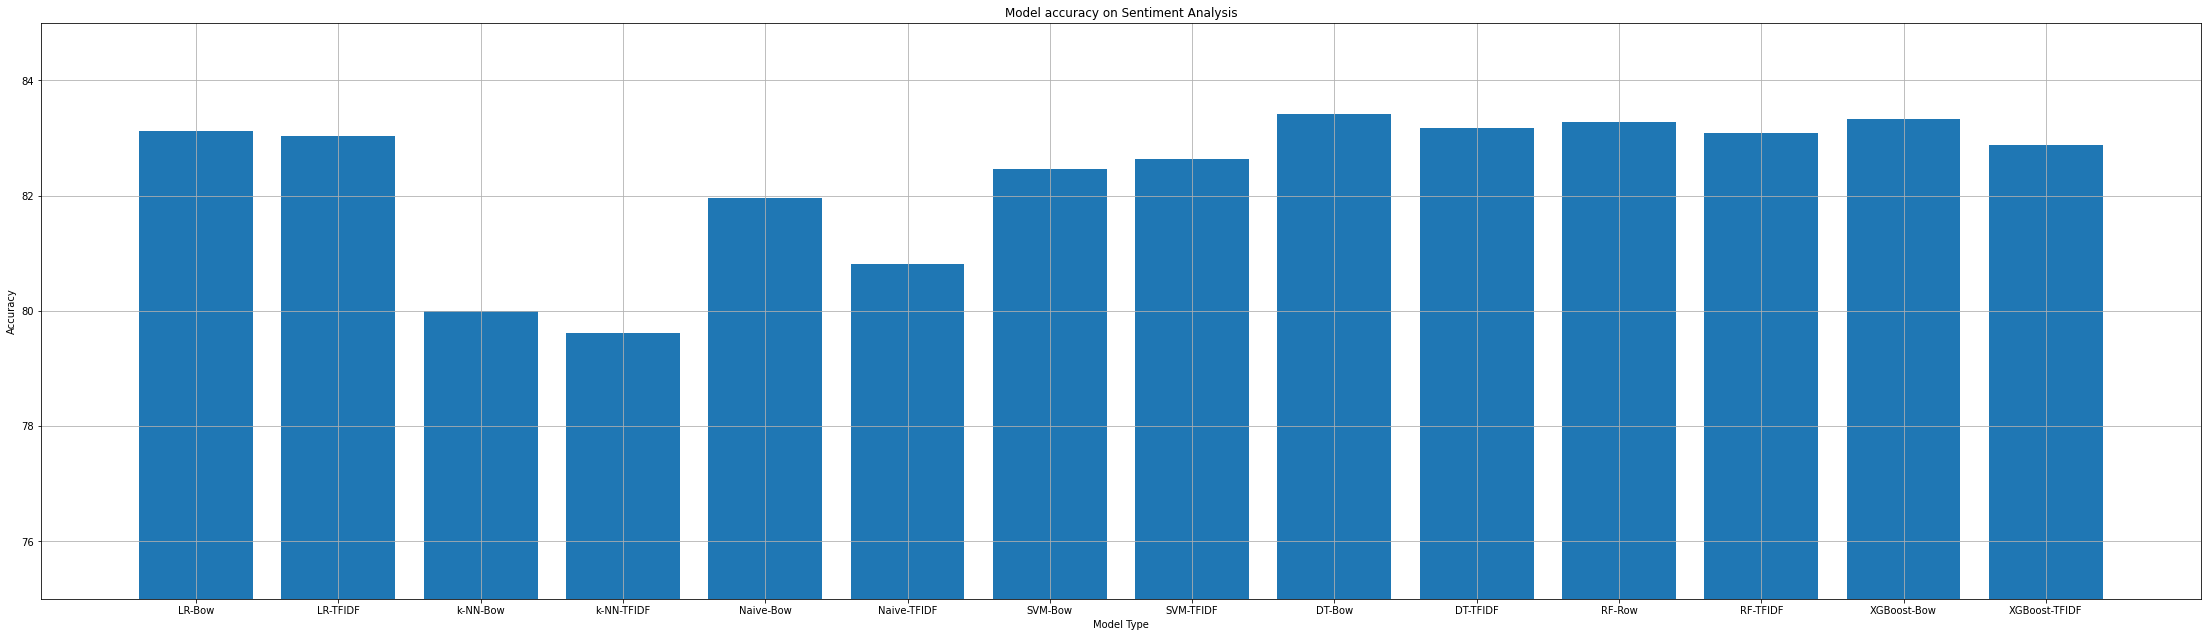

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,5,2])
model_type = ['LR-Bow', 'LR-TFIDF', 'k-NN-Bow', 'k-NN-TFIDF', 'Naive-Bow', 'Naive-TFIDF', 'SVM-Bow', 'SVM-TFIDF', 'DT-Bow', 'DT-TFIDF', 'RF-Row', 'RF-TFIDF', 'XGBoost-Bow', 'XGBoost-TFIDF']
accuracy_percent = [83.12, 83.03, 80, 79.62, 81.96 ,80.81, 82.46, 82.64, 83.42, 83.18, 83.28, 83.08, 83.33, 82.88]
ax.bar(model_type,accuracy_percent)
plt.ylim([75, 85])
plt.grid()
plt.title("Model accuracy on Sentiment Analysis")
plt.xlabel("Model Type")
plt.ylabel("Accuracy")
plt.show()



**Part 4 - Model Implementation and Tuning**

In [ ]:
# Election bag of words data preparation

X_df = df_clean['text']
X_df = X_df.apply(lambda x: ' '.join([item for item in x.split() if item in commonwords]))

from sklearn.feature_extraction.text import CountVectorizer
bow_df = CountVectorizer()
bow_vectors_df = bow_df.fit_transform(X_df)
bow_feature_names_df = bow_df.get_feature_names_out()

bow_dense_df = bow_vectors_df.todense()
bow_denselist_df = bow_dense_df.tolist()

df_bow = pd.DataFrame(bow_denselist_df, columns=bow_feature_names_df)
df_bow

,always,amazing,amp,awesome,back,bad,beautiful,best,better,big,birthday,cant,come,cool,could,day,didnt,dont,enjoy,even,ever,every,everyone,excited,family,feel,find,first,follow,forget,free,friend,friends,fuck,fucking,fun,game,get,getting,go,...,please,pretty,proud,real,really,right,say,see,shit,show,start,still,stop,sweet,take,team,thank,thanks,thing,things,think,time,today,tonight,trump,ur,us,wait,want,way,week,weekend,well,win,work,world,would,year,years,youre
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Election tfidf data preparation

vectorizer_2 = TfidfVectorizer()
vectors_2 = vectorizer_2.fit_transform(X_df)
feature_names_2 = vectorizer_2.get_feature_names_out()

dense_2 = vectors_2.todense()
denselist_2 = dense_2.tolist()

df_tfidf = pd.DataFrame(denselist_2, columns=feature_names_2)
df_tfidf

,always,amazing,amp,awesome,back,bad,beautiful,best,better,big,birthday,cant,come,cool,could,day,didnt,dont,enjoy,even,ever,every,everyone,excited,family,feel,find,first,follow,forget,free,friend,friends,fuck,fucking,fun,game,get,getting,go,...,please,pretty,proud,real,really,right,say,see,shit,show,start,still,stop,sweet,take,team,thank,thanks,thing,things,think,time,today,tonight,trump,ur,us,wait,want,way,week,weekend,well,win,work,world,would,year,years,youre
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.772612,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.281281,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.263087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.295522,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.295522,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.361752,0.0,0.423021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.338353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.360104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.379139,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.521797,0.0,0.0,0.449301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.338030,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.358328,0.0
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
998,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
999,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.

In [ ]:
# Standardize data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_df_bow = scaler.fit_transform(df_bow)
X_df_tfidf = scaler.fit_transform(df_tfidf)

In [ ]:
# Add label that puts negative sentiment as value 0 and positive as value 1

df_clean['label'] = df_clean['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
y_df = df_clean['label']

In [ ]:
df_clean

,text,sentiment,negative_reason,party,label
0,canadian election power grab pm trudeau yes ta...,negative,calling election early,liberal,0
1,hope trudeau loses canadian election tomorrow ...,negative,covid,liberal,0
2,dear canadians election test progressive wheth...,positive,nan,unknown,1
3,canadian friends never forget trudeau 2 years ...,negative,calling election early,liberal,0
4,sorry thejagmeetsingh voted ndp life election ...,positive,nan,ppc,1
...,...,...,...,...,...
997,absolutely horrible canada forthcoming electio...,negative,others,unknown,0
998,davidakin trudeau imposes gun control policies...,negative,gun control,liberal,0
999,canada election stolen thugs uneducated goons ...,negative,others,unknown,0
1000,otoole amends platform gun control questions r...,negative,tell lies,conservatives,0


Only chose 1 model of each bag of words and tfidf to use on the elections data

In [ ]:
# Decision tree bag of words - model that gave the highest accuracy for sentiment analysis

predictions_df_bow= model_dt_bow.predict(X_df_bow)

TN_df_bow = confusion_matrix(y_df, predictions_df_bow)[0][0]
FP_df_bow = confusion_matrix(y_df, predictions_df_bow)[0][1]
FN_df_bow = confusion_matrix(y_df, predictions_df_bow)[1][0]
TP_df_bow = confusion_matrix(y_df, predictions_df_bow)[1][1]
total_df_bow = TN_df_bow + FP_df_bow + FN_df_bow + TP_df_bow
ACC_df_bow = (TP_df_bow + TN_df_bow) / float(total_df_bow)

print ("Decision tree bag of words got an accuracy of {}% on the election set".format(round(ACC_df_bow*100,2))) 

Decision tree bag of words got an accuracy of 62.28% on the election set


In [ ]:
# Random forest tfidf

predictions_df_tfidf = model_rf_tfidf.predict(X_df_tfidf)

TN_df_tfidf = confusion_matrix(y_df, predictions_df_tfidf)[0][0]
FP_df_tfidf = confusion_matrix(y_df, predictions_df_tfidf)[0][1]
FN_df_tfidf = confusion_matrix(y_df, predictions_df_tfidf)[1][0]
TP_df_tfidf = confusion_matrix(y_df, predictions_df_tfidf)[1][1]
total_df_tfidf = TN_df_tfidf + FP_df_tfidf + FN_df_tfidf + TP_df_tfidf
ACC_df_tfidf = (TP_df_tfidf + TN_df_tfidf) / float(total_df_tfidf)

print ("Random forest tfidf got an accuracy of {}% on the election set".format(round(ACC_df_tfidf*100,2))) 

Random forest tfidf got an accuracy of 64.67% on the election set


The model only matches the sentiment labelled in the Canadian elections data about 64% of the time which isn't as good. One reason may be that people tweet / expression emotions differently on twitter when it comes to talking about politics and the elections. Another reason is that the words used in the election dataset may differ alot and may be used in a different context (it. sarcasm). 

**Metrics used to evaluate models:**

- One method to improve accuracy is to include low frequency words, default setting of min_df is 1, no words are ignored. However, due to insufficient memory, the top frequent words are chosen and limited to make it feasible to run the code in a few minutes compared to a few hours. 
- Another method is to perform stemming or lemmatization, this will allow us to obtain/ combine the meaning for similar words. We can also add more stop words to get a more representative list of words that have meaning. 

In [ ]:
# Visulization of the sentiment prediction results and the true sentiment for each of the 4 parties - Confusion matrix
# Best model is tfidf with random forest using the code above, this model will be used as analysis

df_clean['prediction'] = predictions_df_tfidf
df_liberal = df_clean[df_clean['party']=='liberal']
df_conservatives = df_clean[df_clean['party']=='conservatives']
df_ndp = df_clean[df_clean['party']=='ndp']
df_ppc = df_clean[df_clean['party']=='ppc']

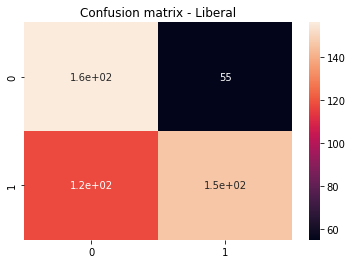

This model got an accuracy of 63.58% for liberal party


In [ ]:
# Visualization for Liberal

import seaborn as sn
con_liberal = confusion_matrix(df_liberal['label'], df_liberal['prediction'])
sn.heatmap(con_liberal, annot=True)
plt.title('Confusion matrix - Liberal')
plt.show()
from sklearn import metrics
accuracy_liberal = metrics.accuracy_score(df_liberal['label'], df_liberal['prediction'])
print ("This model got an accuracy of {}% for liberal party".format(round(accuracy_liberal*100,2))) 

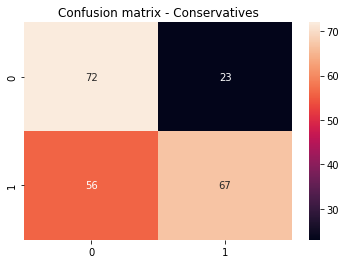

This model got an accuracy of 63.76% for conservative party


In [ ]:
# Visualization for Conservatives

import seaborn as sn
con_conservatives= confusion_matrix(df_conservatives['label'], df_conservatives['prediction'])
sn.heatmap(con_conservatives, annot=True)
plt.title('Confusion matrix - Conservatives')
plt.show()
from sklearn import metrics
accuracy_conservatives = metrics.accuracy_score(df_conservatives['label'], df_conservatives['prediction'])
print ("This model got an accuracy of {}% for conservative party".format(round(accuracy_conservatives*100,2))) 

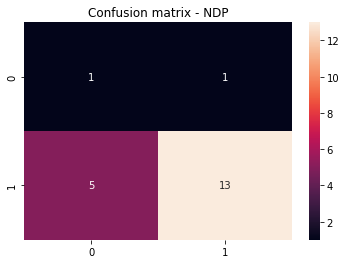

This model got an accuracy of 70.0% for ndp


In [ ]:
# Visualization for NDP

import seaborn as sn
con_ndp= confusion_matrix(df_ndp['label'], df_ndp['prediction'])
sn.heatmap(con_ndp, annot=True)
plt.title('Confusion matrix - NDP')
plt.show()
from sklearn import metrics
accuracy_ndp = metrics.accuracy_score(df_ndp['label'], df_ndp['prediction'])
print ("This model got an accuracy of {}% for ndp".format(round(accuracy_ndp*100,2))) 

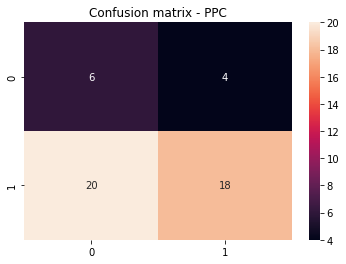

This model got an accuracy of 50.0% for PPC


In [ ]:
# Visualization for PPC

import seaborn as sn
con_ppc= confusion_matrix(df_ppc['label'], df_ppc['prediction'])
sn.heatmap(con_ppc, annot=True)
plt.title('Confusion matrix - PPC')
plt.show()
from sklearn import metrics
accuracy_ppc = metrics.accuracy_score(df_ppc['label'], df_ppc['prediction'])
print ("This model got an accuracy of {}% for PPC".format(round(accuracy_ppc*100,2))) 

The NLP analytics based on tweets is useful during election campaigns. 
From this model, it tells us that Liberal and Conservatives have much more negative comments (left column shows the actual negative results), since these parties are more popular, they're more prone to controversial tweets and have a wide polarity of supporters and opposition. Our model seems to under estimate the number of negative tweets in the election dataset (it thinks the tweets are positive). 

We can compare to the actual election results in 2021: Liberal party won with the Conservative party trailing just a bit. The tweet sentiment for NDP is pretty low but very positive and many people are voting for them (19% for NDP vs 31.5% Liberal and 31% Conservatives). PPC has a mixed sentiment, where half the tweets are positve and the other half is negative. (7% of voted chose them)

One method to increase the accuracy of the model is to have more features and include more common words. Currently it takes the top commonly shared words in both csv files, so it is unable to distinguish between non frequent words. 
Another issue is that if multiple parties are included in a tweet, they are most likely being compared between one another, it's difficult to classify which party is receiving a positive bias and the other negative.

Another method is to apply hypertuning to the modesl (as what we will do in the next section)

**Part 4b - Finding reason for negative tweets**

In [ ]:
# Negative sentiment tweets is seperated

df_negative = df_clean[df_clean['sentiment']=='negative']
df_negative

,text,sentiment,negative_reason,party,label,prediction
0,canadian election power grab pm trudeau yes ta...,negative,calling election early,liberal,0,0
1,hope trudeau loses canadian election tomorrow ...,negative,covid,liberal,0,1
3,canadian friends never forget trudeau 2 years ...,negative,calling election early,liberal,0,0
5,vaccines amp guns key election otoole serious ...,negative,covid,conservatives,0,1
6,im sorry moderators respond leadership candida...,negative,others,unknown,0,0
...,...,...,...,...,...,...
997,absolutely horrible canada forthcoming electio...,negative,others,unknown,0,0
998,davidakin trudeau imposes gun control policies...,negative,gun control,liberal,0,0
999,canada election stolen thugs uneducated goons ...,negative,others,unknown,0,0
1000,otoole amends platform gun control questions r...,negative,tell lies,conservatives,0,0


In [ ]:
# Count the number of unique negative reasons - 11 distinguishable reasons

pd.get_dummies(data=df_negative['negative_reason'], columns=df_negative['negative_reason'].unique())

,calling election early,climate problem,covid,economy,gun control,healthcare marijuana,others,scandal,segregation,tell lies,women reproductive right racism
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
997,0,0,0,0,0,0,1,0,0,0,0
998,0,0,0,0,1,0,0,0,0,0,0
999,0,0,0,0,0,0,1,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Encode the 11 negative reasons with number 0-10

df_negative.negative_reason = pd.Categorical(df_negative.negative_reason)
df_negative['code'] = df_negative.negative_reason.cat.codes

In [ ]:
df_negative

,text,sentiment,negative_reason,party,label,prediction,code
0,canadian election power grab pm trudeau yes ta...,negative,calling election early,liberal,0,0,0
1,hope trudeau loses canadian election tomorrow ...,negative,covid,liberal,0,1,2
3,canadian friends never forget trudeau 2 years ...,negative,calling election early,liberal,0,0,0
5,vaccines amp guns key election otoole serious ...,negative,covid,conservatives,0,1,2
6,im sorry moderators respond leadership candida...,negative,others,unknown,0,0,6
...,...,...,...,...,...,...,...
997,absolutely horrible canada forthcoming electio...,negative,others,unknown,0,0,6
998,davidakin trudeau imposes gun control policies...,negative,gun control,liberal,0,0,4
999,canada election stolen thugs uneducated goons ...,negative,others,unknown,0,0,6
1000,otoole amends platform gun control questions r...,negative,tell lies,conservatives,0,0,9


In [ ]:
# Split the data

X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(df_negative['text'], df_negative['code'], test_size = 0.3, random_state = 0)

In [ ]:
# Check for common words

word_freq_train = pd.Series(''.join(X_train_neg).split()).value_counts()
word_freq_test = pd.Series(''.join(X_test_neg).split()).value_counts()

In [ ]:
# Define common words to be the intersection of training set and test set

commonwords_neg = {}
commonwords_neg = word_freq_train.index & word_freq_test.index
commonwords_neg = commonwords_neg[:500] # only take 500 words (i.e. features)

In [ ]:
# Keep the 500 most common words

X_train_neg = X_train_neg.apply(lambda x: ' '.join([item for item in x.split() if item in commonwords_neg]))
X_test_neg = X_test_neg.apply(lambda x: ' '.join([item for item in x.split() if item in commonwords_neg]))

In [ ]:
# Data preparation using bag of words for training data

from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer()
bow_vectors_train_neg = bow.fit_transform(X_train_neg)
bow_feature_names_train_neg = bow.get_feature_names_out()

bow_dense_train_neg = bow_vectors_train_neg.todense()
bow_denselist_train_neg = bow_dense_train_neg.tolist()

df_bow_train_neg = pd.DataFrame(bow_denselist_train_neg, columns=bow_feature_names_train_neg)
df_bow_train_neg

,18,20,4th,50,600,able,act,actually,address,ads,advocating,afghanistan,ago,agree,alberta,already,also,althiaraj,always,americans,amp,anger,angry,another,answer,anti,anyone,anything,apparently,appears,arent,ask,assault,astounding,attempt,away,back,bad,ballot,ban,...,violence,voice,vote,voted,voteliberal,voteliberalmajority,voteppc,voters,votes,voting,waiting,wake,want,wanted,wants,war,waste,water,wave,way,weak,well,white,win,wins,without,woman,wont,words,work,workers,works,worst,would,yeah,year,years,yes,yet,youre
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
266,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
267,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
268,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Data preparation using bag of words for test data

from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer()
bow_vectors_test_neg = bow.fit_transform(X_test_neg)
bow_feature_names_test_neg = bow.get_feature_names_out()

bow_dense_test_neg = bow_vectors_test_neg.todense()
bow_denselist_test_neg = bow_dense_test_neg.tolist()

df_bow_test_neg = pd.DataFrame(bow_denselist_test_neg, columns=bow_feature_names_test_neg)
df_bow_test_neg

,18,20,4th,50,600,able,act,actually,address,ads,advocating,afghanistan,ago,agree,alberta,already,also,althiaraj,always,americans,amp,anger,angry,another,answer,anti,anyone,anything,apparently,appears,arent,ask,assault,astounding,attempt,away,back,bad,ballot,ban,...,violence,voice,vote,voted,voteliberal,voteliberalmajority,voteppc,voters,votes,voting,waiting,wake,want,wanted,wants,war,waste,water,wave,way,weak,well,white,win,wins,without,woman,wont,words,work,workers,works,worst,would,yeah,year,years,yes,yet,youre
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
113,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Standardization

X_train_neg = scaler.fit_transform(df_bow_train_neg)
X_test_neg = scaler.fit_transform(df_bow_test_neg)

In [ ]:
# Training multi-class classification models to predict the reason for negative tweets
# Hyperparameter tuning with lasso

from sklearn.metrics import make_scorer, r2_score, confusion_matrix
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, KFold

reg_gridsearch = linear_model.Lasso(tol = 0.001, random_state=0) # Convergence issues, increased the tolerance for convergence
#Parameters to test
parameters = {'alpha':[0.01,0.05, 0.1,0.5,1,3,5,10]} # Constant that multiplies the L1 term. Defaults to 1.0.

# Compare parameters by score of model 
acc_scorer_lm = make_scorer(r2_score)

# Run the grid search
grid_obj_lm = GridSearchCV(reg_gridsearch, parameters, cv =5, scoring=acc_scorer_lm)
grid_obj_lm = grid_obj_lm.fit(X_train_neg, y_train_neg)

reg_gridsearch = grid_obj_lm.best_estimator_  # Select best parameter combination

print('Best alpha used is:',grid_obj_lm.best_estimator_.alpha) 

Best alpha used is: 0.1


In [ ]:
predictions_lasso=reg_gridsearch.predict(X_test_neg)
predictions_lasso = np.rint(predictions_lasso) # round to the nearest integer
accuracy_lasso = metrics.accuracy_score(y_test_neg, predictions_lasso)
print ("Lasso model got an accuracy of {}% on the negative set".format(round(accuracy_lasso*100,2))) 

Lasso model got an accuracy of 14.53% on the negative set


In [ ]:
# Logistic regression - bag of words
model_lr = LogisticRegression(C=0.10,max_iter=500)    
model_lr.fit(X_train_neg, y_train_neg)
predictions_lr = model_lr.predict(X_test_neg)

from sklearn import metrics
accuracy_lr = metrics.accuracy_score(y_test_neg, predictions_lr)
print ("This model got an accuracy of {}% on the negative set".format(round(accuracy_lr*100,2))) 

This model got an accuracy of 46.15% on the negative set


In [ ]:
# Random forest - bag of words

model_rf = RandomForestClassifier(max_depth = 50, n_estimators=50) 
model_rf.fit(X_train_neg,y_train_neg)
predictions_rf = model_rf.predict(X_test_neg)
accuracy_rf = metrics.accuracy_score(y_test_neg, predictions_rf)
print ("Random forest got an accuracy of {}% on the negative set".format(round(accuracy_rf*100,2)))

Random forest got an accuracy of 52.99% on the testing set


Random forest chooses the correct negative reason about 53% of the time which is pretty good considering there are 11 unique reasons.

In [ ]:
# Hyperparameter Tuning - using GridsearchCV on either linear regression or random forest

from sklearn.pipeline import Pipeline
# Create first pipeline for base without reducing features.

pipe = Pipeline([('classifier' , RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 2, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train_neg, y_train_neg)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


In [ ]:
# Accuracy based on hyperparameter tuning

predictions_lr = best_clf.predict(X_test_neg)

from sklearn import metrics
accuracy_lr = metrics.accuracy_score(y_test_neg, predictions_lr)
print ("This model got an accuracy of {}% on the negative set".format(round(accuracy_lr*100,2))) 

This model got an accuracy of 50.43% on the negative set


Since the accuracy is lower, the model may be overfitting to the training data.

In [ ]:
# Example from the test sets for model failure
y_test_neg.index[np.array(y_test_neg) == 8]

Int64Index([], dtype='int64')

In [ ]:
y_test_neg.index[np.array(y_test_neg) == 6]

Int64Index([726, 887, 911, 420, 841, 159, 699, 855, 997, 835, 823, 679, 811,
            891, 934, 978, 831, 105,  74, 889, 752,  27, 848,   7, 225, 926,
            575, 822, 837, 958, 839, 579,  95, 849, 893, 101, 863, 578, 981,
            916, 827, 834, 949, 838, 972, 698,  41, 908, 737,  84, 814, 617],
           dtype='int64')

**Low accuracy / fail to predict the correct negative reasons may be due to many factors:**

For example code 8 (segregation) has no results, and code 6(others) has too many results. To improve the accuracy, we can try using more training data for the model to learn more words associated with each code / negative reason.

Another reason is that the model may be overfitting to the training data and irrelevant words, by placing more stop words, the model can emphasis/focus on the more meaningful words. 

Another method is to try using different models and apply hypertuning on them.

In [ ]:
df_1_neg = df_1_clean[df_1_clean['label'] == 0]
df_1_pos = df_1_clean[df_1_clean['label'] == 1]

In [ ]:
word_freq_neg = pd.Series(''.join(df_1_neg['text']).split()).value_counts()
word_freq_pos = pd.Series(''.join(df_1_pos['text']).split()).value_counts()

In [ ]:
df_neg_4c = df_clean[df_clean['sentiment']=='negative']
df_pos_4c = df_clean[df_clean['sentiment']=='positive']

In [ ]:
word_freq_election_neg = pd.Series(''.join(df_neg_4c['text']).split()).value_counts()
word_freq_election_pos = pd.Series(''.join(df_pos_4c['text']).split()).value_counts()

In [ ]:
# Negative top 50 words for negative election sentiment

commonwords_neg_election = {}
commonwords_neg_election = word_freq_neg.index & word_freq_election_neg.index
commonwords_neg_election = commonwords_neg_election[:50] # only take 50 words

In [ ]:
commonwords_neg_election

Index(['im', 'dont', 'like', 'cant', 'get', 'amp', 'people', 'bad', 'know',
       'fuck', 'one', 'trump', 'fucking', 'u', 'even', 'never', 'hate', 'got',
       'really', 'still', 'youre', 'shit', 'time', 'want', 'stop', 'look',
       'go', 'didnt', 'dead', 'see', 'ass', 'make', 'wont', 'man', 'doesnt',
       'new', 'us', 'much', 'day', 'need', 'killed', 'says', 'life', '2',
       'think', 'death', 'take', 'going', 'right', 'back'],
      dtype='object')

In [ ]:
# Positive top 50 words for positive election sentiment

commonwords_pos_election = {}
commonwords_pos_election = word_freq_pos.index & word_freq_election_pos.index
commonwords_pos_election = commonwords_pos_election[:50] # only take 50 words

In [ ]:
commonwords_pos_election

Index(['love', 'birthday', 'happy', 'great', 'amazing', 'good', 'best', 'amp',
       'day', 'thank', 'one', 'beautiful', 'im', 'thanks', 'new', 'much',
       'today', 'fun', 'hope', 'see', 'get', 'like', 'us', 'time', 'win',
       'make', 'wait', 'cant', 'look', 'night', 'awesome', 'ever', 'morning',
       'never', 'life', 'nice', 'always', 'proud', 'back', 'enjoy', 'dont',
       'way', 'perfect', 'got', 'excited', 'really', 'follow', 'people',
       'free', 'first'],
      dtype='object')

In [ ]:
# Negative top 50 words for all election tweets

commonwords_neg_election = {}
commonwords_neg_election = word_freq_neg.index & word_freq_election.index
commonwords_neg_election = commonwords_neg_election[:50] # only take 50 
commonwords_neg_election

Index(['im', 'dont', 'like', 'cant', 'get', 'amp', 'people', 'bad', 'know',
       'fuck', 'one', 'trump', 'fucking', 'u', 'even', 'never', 'hate', 'got',
       'really', 'still', 'youre', 'shit', 'time', 'want', 'stop', 'look',
       'go', 'didnt', 'dead', 'see', 'ass', 'make', 'wont', 'man', 'doesnt',
       'new', 'us', 'much', 'day', 'need', 'killed', 'says', 'life', '2',
       'think', 'death', 'take', 'going', 'right', 'back'],
      dtype='object')

In [ ]:
# Positive top 50 words for all election tweets

commonwords_pos_election = {}
commonwords_pos_election = word_freq_pos.index & word_freq_election.index
commonwords_pos_election = commonwords_pos_election[:50] # only take 50 words
commonwords_pos_election

Index(['love', 'birthday', 'happy', 'great', 'amazing', 'good', 'best', 'amp',
       'day', 'thank', 'one', 'beautiful', 'im', 'thanks', 'new', 'much',
       'today', 'fun', 'hope', 'see', 'get', 'like', 'u', 'us', 'time', 'win',
       'make', 'wait', 'cant', 'look', 'night', 'awesome', 'ever', 'morning',
       'never', 'life', 'nice', 'always', 'proud', 'back', 'enjoy', 'dont',
       'way', 'perfect', 'miss', 'got', 'excited', 'really', 'follow',
       'people'],
      dtype='object')

Ranking the top 50 most frequent non-stop words in the Canadian Election dataset, we can observe that:     
- Relating to Part 4.a.a, the model accuracy on distinguishing between engative and positive election tweets may be low because there are many common words between the positive and negative sentiments tweets that are shared among each other. There are many cases, for example, the word 'like' is commonly seen in both, however, for the negative sentiment, there are a few words (ie. do not like) that can cause a semantic change.
- This helps us observe what words are used as a factor on deciding the sentiment of the tweet.

In [150]:
df_negative['negative_reason'].value_counts()

others                             149
calling election early              73
tell lies                           61
covid                               25
economy                             20
gun control                         16
climate problem                     15
scandal                             14
healthcare marijuana                 7
women reproductive right racism      4
segregation                          3
Name: negative_reason, dtype: int64

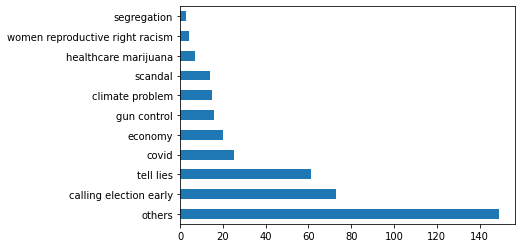

In [151]:
df_negative['negative_reason'].value_counts().plot(kind='barh')